In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
#加载主题包
from jupyterthemes import jtplot
jtplot.style(theme='oceans16')

from scipy.stats import norm
from scipy import stats
#多行打印设置
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
#定义读取文件函数

def load_text(des):
    data = open(des, 'rU')
    ldic = []
    for line in data:
        ldic.append(line.strip().split('\t'))
    cdic = {}
    for l in ldic:
        if ':' in l[0]:
            x = l[0]
            cdic[x] = []
            ll = []
        ll.append(l)
        cdic[x] = ll
    return(cdic)

#定义提取取值含义函数

def judge_c(x,cdic):
       
    for lc in cdic.keys():
        if x in lc:
            y = lc
    return(cdic[y])



# read data

In [3]:
%%time
wd = '/Users/didiw/Documents/study/kaggle/project/homeprice/Data/'
train = pd.read_csv(wd+'train.csv')
test = pd.read_csv(wd+'test.csv')

cdic = load_text(wd+'data_description.txt')

CPU times: user 63 ms, sys: 11.8 ms, total: 74.8 ms
Wall time: 81.9 ms


/Users/didiw/anaconda3/envs/py3ana/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 'U' mode is deprecated
  after removing the cwd from sys.path.


In [4]:
print('Train data shape : ',train.shape)
print('Test data shape : ',test.shape)

Train data shape :  (1460, 81)
Test data shape :  (1459, 80)


In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [7]:
print("skew is :",train.SalePrice.skew())

skew is : 1.8828757597682129


/Users/didiw/anaconda3/envs/py3ana/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


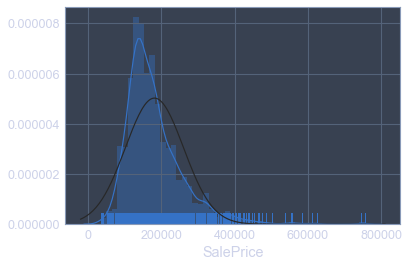

In [8]:
sns.distplot(train.SalePrice,rug = True,fit=norm)

/Users/didiw/anaconda3/envs/py3ana/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


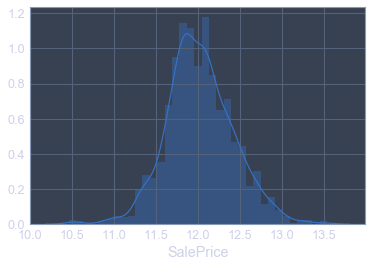

In [9]:
target = np.log(train.SalePrice)
sns.distplot(target)

In [10]:
numeric_features = train.select_dtypes(include=[np.number])

In [11]:
corr = numeric_features.corr()

In [15]:
print(corr['SalePrice'].sort_values(ascending=False)[:5,],'\n')
print(corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [20]:
np.sort((train.OverallQual.unique()))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [21]:
quality_pivot = train.pivot_table(index='OverallQual',values='SalePrice',aggfunc=np.median)

In [22]:
quality_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


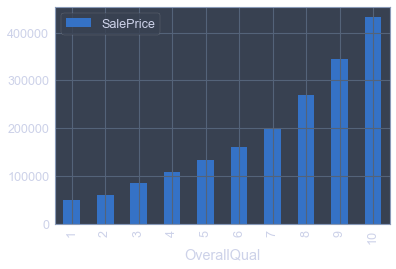

In [24]:
quality_pivot.plot(kind='bar')

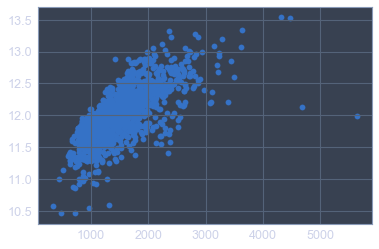

In [25]:
plt.scatter(x=train['GrLivArea'],y=target)

In [26]:
train.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
7,False,False,False,True,False,False,True,False,False,False,...,False,True,True,False,False,False,False,False,False,False
8,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
9,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
